<p><img alt="Colaboratory logo" height="45px" src=https://www.yuntech.edu.tw/images/mainmenu/about/yuntech_logo.jpg width="28" align="left" hspace="10px" vspace="27px" style="margin: 27px 10px"></p>
<h1><font color="red">    金融數據</font>與<font color="green">程式設計</font></h1>
<a id='HOME'></a>
<h4 style="font-weight: bold"><font color="blue">作者：劉文讓</font></h4>

Python是一種物件導向的電腦程式語言，在2017年 IEEE 程式語言調查、Kaggle 使用者調查都榮登第一名，為資料科學家最喜愛的程式語言。

Pandas是Python的一個專門用來做數據分析的套件，也是目前全世界數據分析師最喜歡使用的套件之一。

`參考網址`：
[104Pandas相關職缺](https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=pandas&jobcatExpansionType=1&order=15&asc=0&page=3&mode=s)
[美國Python資料分析師平均年薪](https://www.ziprecruiter.com/Salaries/Python-Data-Scientist-Salary)


### 課程目錄：

* [0 認識Jupyter Notebook編輯器](#c0)
* [1 Pandas的資料類型](#c1)
* [2 索引值的運用與資料篩選](#c2)
* [3 下載真正的股票資料](#c3)
* [4 基本資料分析](#c4)
* [5 資料視覺化](#c5)
* [補充：操作Excel的寫入與寫出方法](#appendix)

------
<a id='c0'></a>
## 0 認識Jupyter Notebook編輯器
[回目錄](#HOME)

- **執行程式：**
按工具列鈕`►|Run`或按 Shift-Enter 鍵執行完程式後會將游標移到下一個 Cell ，如果下一個 Cell 不存在，即會新增一個 Cell 再移到其中。按 Ctrl-Enter 鍵執行完程式後則游標會停留在原有 Cell。

![執行](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

- **常用快捷鍵 (在cell旁邊出現藍色時)：**
    - 按下`Shift+Enter`：執行當前的cell並且選到下一個cell
    - 按下`a`：在當前選擇的上方新增一個cell
    - 按下`b`：在當前選擇的下方新增一個cell
    - 按下`x`：剪下當前選擇的cell
    - 按下`v`：貼上剛剪下的cell到下方的cell
    - 按下`d+d`：刪除當前的cell
    - 按下`m`：轉成markerdown模式，可以看到紅色框框內容從code變成markerdown
    - 按下`y`：轉回code模式。
    - 按下`shift+tab`：變數及函數參數的提示

 - **匯入套件：**首先我們要先匯入今天會用到的套件，例如：`Pandas`、`Numpy`、`datetime`、`Pandas_datareader`、`Matplotlib`、`Pyecharts`。

In [2]:
#%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pyecharts import options as opts   
from pyecharts.charts import Kline

------
<a id='c1'></a>
## 1 Pandas的資料類型
[回目錄](#HOME)

Pandas是一個基於Numpy的package，在處理數據方面非常的好用簡單，在學習pandas之前我們要先知道pandas的兩種特有的資料結構DataFrame與Series。

### Series

`Series`，是一個類似陣列的資料結構，最簡單的Series格式就是一個一維陣列的資料：

In [3]:
s = pd.Series([1,3,-5,6,8])
print (s)

0    1
1    3
2   -5
3    6
4    8
dtype: int64


- 使用日期當作index

In [4]:
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

### DataFrame
`DataFrame` 則是二維陣列：就像是我們在使用的excel表格一樣，是一個二維的數據有index和column。

- 我們先定義一個字典資料，裡面包含name、year、month、day (各欄位的名稱)，接著將它轉成dataframe的格式並顯示：

     - 行(欄)名稱：name、year、month、day
     - 列(索引值)名稱：0、1、2、3、4

In [5]:
data = {'name': ['Bob', 'Nancy','Amy','Elsa','Jack'],
        'year': [1996, 1997, 1997, 1996, 1997],
        'month': [8, 8, 7, 1, 12],
        'day':[11,23,8,3,11]}
myframe = pd.DataFrame(data)
myframe

,name,year,month,day
0,Bob,1996,8,11
1,Nancy,1997,8,23
2,Amy,1997,7,8
3,Elsa,1996,1,3
4,Jack,1997,12,11


- 亂數產生學期成績資料 (需匯入Numpy套件)：

In [6]:
# 產生6*4的陣列
np.random.seed(0)
scores=np.random.randint(low=20,high=100,size=(6,4))
scores

array([[64, 67, 84, 87],
       [87, 29, 41, 56],
       [90, 32, 78, 85],
       [59, 66, 57, 45],
       [97, 92, 29, 40],
       [89, 99, 67, 84]])

建立dataframe資料

In [7]:
df = pd.DataFrame(scores, index=['張無忌','趙敏','程靈素','郭靖','令狐沖','黃蓉'], columns=['財務管理','投資學','會計學','經濟學'])
df

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


- 查看匯入的資料：

`index`：列(索引值)的名稱

`columns`：欄位的名稱

`values`：資料內容

In [8]:
df.index

Index(['張無忌', '趙敏', '程靈素', '郭靖', '令狐沖', '黃蓉'], dtype='object')

In [9]:
df.columns

Index(['財務管理', '投資學', '會計學', '經濟學'], dtype='object')

In [10]:
df.values

array([[64, 67, 84, 87],
       [87, 29, 41, 56],
       [90, 32, 78, 85],
       [59, 66, 57, 45],
       [97, 92, 29, 40],
       [89, 99, 67, 84]])

`head` 與 `tail` 可以分別查看資料最前面幾列或最後面幾列：

In [11]:
df.head()

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40


In [12]:
df.tail(2)

,財務管理,投資學,會計學,經濟學
令狐沖,97,92,29,40
黃蓉,89,99,67,84


------
<a id='c2'></a>
## **2 索引值的運用與資料篩選**
[回目錄](#HOME)

In [13]:
df

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


- 取出其中一欄資料：

例如：查詢全班學生的投資學成績

In [14]:
df['投資學']

張無忌    67
趙敏     29
程靈素    32
郭靖     66
令狐沖    92
黃蓉     99
Name: 投資學, dtype: int64

In [15]:
df.投資學

張無忌    67
趙敏     29
程靈素    32
郭靖     66
令狐沖    92
黃蓉     99
Name: 投資學, dtype: int64

- 取出某範圍的列資料：

例如：查詢其中幾位同學的四科成績。

In [16]:
#系統內建索引值，第一筆等於0。若我們想取出資料0到(3-1)，則取出張無忌(0)到程靈素(2)的資料。
df[0:3]

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85


In [17]:
#我們也能使用者自訂的索引值(學生姓名)來擷取出特定資料
df["程靈素":"黃蓉"]

,財務管理,投資學,會計學,經濟學
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


- 取出特定一筆資料，第一個中括號內放入column欄位名稱，第二個中括號內放入索引值範圍。索引值可以使用系統內建或是使用者自訂的。

`例如`：查詢令狐沖的會計學成績

In [18]:
df["會計學"]["令狐沖"]

29

`例如`：查詢某一科多位學生的成績。

In [19]:
df["會計學"][3:6]

郭靖     57
令狐沖    29
黃蓉     67
Name: 會計學, dtype: int64

In [20]:
df["會計學"]["郭靖":"黃蓉"]

郭靖     57
令狐沖    29
黃蓉     67
Name: 會計學, dtype: int64

`例如`：查詢趙敏多科成績。

In [21]:
df[["會計學","經濟學"]][1:2]

,會計學,經濟學
趙敏,41,56


In [22]:
df[["會計學","經濟學"]]['趙敏':'趙敏']

,會計學,經濟學
趙敏,41,56


### `loc` 與 `iloc`定位方法：最推薦的取值方法

``````Python
df.loc[列的範圍(自訂索引), [行的範圍(自訂索引)]]
df.iloc[列的範圍(內建索引), [行的範圍(內建索引)]]
``````

In [23]:
df

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


`例如`：查詢令狐沖的會計學成績

只有一列或一行得用括號。

In [24]:
df.loc[('令狐沖'),('會計學')]

29

In [25]:
df.iloc[(4),(2)]

29

`例如`：查詢某一科多位學生的成績。

In [26]:
df.loc["郭靖":"黃蓉",["會計學"]]

,會計學
郭靖,57
令狐沖,29
黃蓉,67


In [27]:
df.iloc[3:6,2]

郭靖     57
令狐沖    29
黃蓉     67
Name: 會計學, dtype: int64

`例如`：查詢會計學與經濟學多位學生的成績。

In [28]:
df.loc["郭靖":"黃蓉",["會計學","經濟學"]]

,會計學,經濟學
郭靖,57,45
令狐沖,29,40
黃蓉,67,84


In [29]:
df.iloc[3:6,[2,3]]

,會計學,經濟學
郭靖,57,45
令狐沖,29,40
黃蓉,67,84


`例如`：查詢趙敏多科成績。

In [30]:
df.loc['趙敏',["會計學","經濟學"]]

會計學    41
經濟學    56
Name: 趙敏, dtype: int64

In [31]:
df.iloc[1,[2,3]]

會計學    41
經濟學    56
Name: 趙敏, dtype: int64

`例如`：查詢座號不連續(趙敏與令狐沖)的同學他們的會計學與經濟學成績。

**<font color="red">底下程式是無法執行的：</font>**
``````Python
df.loc[['趙敏','令狐沖'],["會計學","經濟學"]]
``````

**<font color="blue">底下程式是可以執行的：</font>**
``````Python
df.loc[['趙敏','令狐沖'],:]
``````

In [32]:
df.iloc[[1,4],[2,3]]

,會計學,經濟學
趙敏,41,56
令狐沖,29,40


`例如`：查詢財務管理及格的同學，並列出他們的會計學與經濟學成績。

In [33]:
df.loc[df.財務管理>=60,["會計學","經濟學"]]

,會計學,經濟學
張無忌,84,87
趙敏,41,56
程靈素,78,85
令狐沖,29,40
黃蓉,67,84


------
<a id='c3'></a>
## **3 下載真正的股票資料**
[回目錄](#HOME)

資料來源：[Yahoo Finance](https://finance.yahoo.com/)

**1. 手動匯入(較累較不推薦)：**

    1. 輸入股票代碼 (例如：^TWII, 2330.tw, ^GSPC, AAPL, IBM)
    2. 選擇時間範圍
    3. 下載(`Download`)檔案(`.csv`)
    4. 資料存放在同一資料夾
    5. 匯入資料 (`pd.read_csv("檔案名稱")`)

**2. 使用pandas-datareader套件(方便且容易)：**

    1. 安裝pandas-datareader套件：!pip install pandas-datareader
    2. 輸入股票代碼 (例如：^TWII, ^GSPC, AAPL, IBM)
    3. 選擇時間範圍
    4. 匯入資料，總共會有底下欄位：Open, High, Low, Close, Adj Close,Volume
    5. 自動使用日期格式當作索引值

In [34]:
開始日=datetime.datetime(2020,1,1)
股票代碼='2330.tw'
結束日=datetime.datetime(2020,7,31)
s2330=web.DataReader(股票代碼,'yahoo',開始日,結束日)
s2330.head()
#df.plot(y='Close',title='Time-series plot',kind='line',legend=False)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,339.0,332.5,332.5,339.0,31754120.0,333.075775
2020-01-03,345.0,335.5,344.0,339.5,41811268.0,333.567047
2020-01-06,334.5,332.0,333.0,332.0,45343057.0,326.198120
2020-01-07,333.0,326.5,332.5,329.5,50879181.0,323.741791
2020-01-08,333.0,325.0,325.0,329.5,37567748.0,323.741791


### **練習 1：資料擷取**
1. 請下載台灣加權股價指數資料，資料期間為2020年1月1日至2020年7月31日，並列出前五筆資料。
2. 請你列出2020年3月19日及2020年7月31日當天的收盤價(Close)與交易量(Volume)。
3. 請你列出台灣加權股價指數收盤價超過12000點的資料。

------
<a id='c4'></a>
## **4 基本資料分析**
[回目錄](#HOME)


In [35]:
#scores=np.random.randint(low=30,high=100,size=(6,4))
df = pd.DataFrame(scores, index=['張無忌','趙敏','程靈素','郭靖','令狐沖','黃蓉'], columns=['財務管理','投資學','會計學','經濟學'])
df

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


### 基本敘述統計量
- 平均數 `mean`
- 標準差 `std`
- 偏態 `skew`
- 峰態 `kurt`
- 以上所有 `describe`

- mean(axis)：平均值
    - `axis=0`：為預設值，針對同一行(欄)內所有不同列的元素去做運算。
    - `axis=1`：針對同一列內所有不同行的元素去做運算。

每一欄(行)的平均值

In [36]:
df.mean()

財務管理    81.000000
投資學     64.166667
會計學     59.333333
經濟學     66.166667
dtype: float64

In [37]:
df.mean(0)

財務管理    81.000000
投資學     64.166667
會計學     59.333333
經濟學     66.166667
dtype: float64

每一列(筆)的平均值

In [38]:
#計算出每位同學所有課程的學期平均。
df.mean(1)

張無忌    75.50
趙敏     53.25
程靈素    71.25
郭靖     56.75
令狐沖    64.50
黃蓉     84.75
dtype: float64

特定一個欄位的平均值

In [39]:
df['經濟學'].mean()

66.16666666666667

In [40]:
df.經濟學.mean()

66.16666666666667

某位同學(某列資料)的四科成績平均

In [41]:
df.loc['黃蓉',:].mean()

84.75

列出所有欄位的敘述性統計量

In [42]:
df.describe()

,財務管理,投資學,會計學,經濟學
count,6.000000,6.000000,6.000000,6.000000
mean,81.000000,64.166667,59.333333,66.166667
std,15.556349,29.226130,21.341665,21.646401
min,59.000000,29.000000,29.000000,40.000000
25%,69.750000,40.500000,45.000000,47.750000
50%,88.000000,66.500000,62.000000,70.000000
75%,89.750000,85.750000,75.250000,84.750000
max,97.000000,99.000000,84.000000,87.000000


### 相關係數 (`corr`)
- `data.corr()` 相關係數矩陣
- `data.欄位名稱1.corr(data.欄位名稱2)` 指定兩個變數的相關係數

四個欄位的相關係數

In [43]:
df.corr()

,財務管理,投資學,會計學,經濟學
財務管理,1.000000,0.059386,-0.442171,-0.033260
投資學,0.059386,1.000000,-0.149850,-0.105958
會計學,-0.442171,-0.149850,1.000000,0.879566
經濟學,-0.033260,-0.105958,0.879566,1.000000


In [44]:
df.財務管理.corr(df.投資學)

0.05938609538380582

新產生一個欄位為四科成績的加總

In [45]:
df['學期總分']=df[["財務管理", "投資學", "會計學", "經濟學"]].sum(1)
df

,財務管理,投資學,會計學,經濟學,學期總分
張無忌,64,67,84,87,302
趙敏,87,29,41,56,213
程靈素,90,32,78,85,285
郭靖,59,66,57,45,227
令狐沖,97,92,29,40,258
黃蓉,89,99,67,84,339


新產生一個欄位為四科成績的平均值

In [46]:
df['平均分數']=df[["財務管理", "投資學", "會計學", "經濟學"]].mean(1)
df

,財務管理,投資學,會計學,經濟學,學期總分,平均分數
張無忌,64,67,84,87,302,75.50
趙敏,87,29,41,56,213,53.25
程靈素,90,32,78,85,285,71.25
郭靖,59,66,57,45,227,56.75
令狐沖,97,92,29,40,258,64.50
黃蓉,89,99,67,84,339,84.75


新產生一個欄位為四科成績的加權總分

In [47]:
df['加權總分']=df['財務管理']*1.5+df['投資學']*1.2+df['會計學']+df['經濟學']
df

,財務管理,投資學,會計學,經濟學,學期總分,平均分數,加權總分
張無忌,64,67,84,87,302,75.50,347.4
趙敏,87,29,41,56,213,53.25,262.3
程靈素,90,32,78,85,285,71.25,336.4
郭靖,59,66,57,45,227,56.75,269.7
令狐沖,97,92,29,40,258,64.50,324.9
黃蓉,89,99,67,84,339,84.75,403.3


In [48]:
df['加權平均']=df['加權總分']/4.7
df

,財務管理,投資學,會計學,經濟學,學期總分,平均分數,加權總分,加權平均
張無忌,64,67,84,87,302,75.50,347.4,73.914894
趙敏,87,29,41,56,213,53.25,262.3,55.808511
程靈素,90,32,78,85,285,71.25,336.4,71.574468
郭靖,59,66,57,45,227,56.75,269.7,57.382979
令狐沖,97,92,29,40,258,64.50,324.9,69.127660
黃蓉,89,99,67,84,339,84.75,403.3,85.808511


- 排序

我們來看全班學期總分最高的同學

In [49]:
#ascending=False指資料由大到小去排序
df.sort_values(by=["學期總分"], ascending=False)

,財務管理,投資學,會計學,經濟學,學期總分,平均分數,加權總分,加權平均
黃蓉,89,99,67,84,339,84.75,403.3,85.808511
張無忌,64,67,84,87,302,75.50,347.4,73.914894
程靈素,90,32,78,85,285,71.25,336.4,71.574468
令狐沖,97,92,29,40,258,64.50,324.9,69.127660
郭靖,59,66,57,45,227,56.75,269.7,57.382979
趙敏,87,29,41,56,213,53.25,262.3,55.808511


先看會計學, 再看學期總分

In [50]:
df.sort_values(by=["會計學","學期總分"], ascending=False)

,財務管理,投資學,會計學,經濟學,學期總分,平均分數,加權總分,加權平均
張無忌,64,67,84,87,302,75.50,347.4,73.914894
程靈素,90,32,78,85,285,71.25,336.4,71.574468
黃蓉,89,99,67,84,339,84.75,403.3,85.808511
郭靖,59,66,57,45,227,56.75,269.7,57.382979
趙敏,87,29,41,56,213,53.25,262.3,55.808511
令狐沖,97,92,29,40,258,64.50,324.9,69.127660


### 時間序列資料分析
- 常用函式：
    - 移動敘述統計量
    - 差分
    - 資料平移

In [51]:
#先建立資料
s1 = pd.Series([1,2,3,4,5,6], index=date)
s2 = pd.Series([5,6,7,8,9,10], index=date)
s3 = pd.Series([11,12,5,7,8,2], index=date)

dictionary = {
    'c1': s1,
    'c2': s2,
    'c3': s3,
}

ss = pd.DataFrame(dictionary)
ss

,c1,c2,c3
2018-01-01,1,5,11
2018-01-02,2,6,12
2018-01-03,3,7,5
2018-01-04,4,8,7
2018-01-05,5,9,8
2018-01-06,6,10,2


- 移動平均

In [52]:
ss.rolling(2).mean()

,c1,c2,c3
2018-01-01,NaN,NaN,NaN
2018-01-02,1.5,5.5,11.5
2018-01-03,2.5,6.5,8.5
2018-01-04,3.5,7.5,6.0
2018-01-05,4.5,8.5,7.5
2018-01-06,5.5,9.5,5.0


- 差分 (`.diff(1)`)：後項減去前項

In [53]:
ss['c3差分']=ss['c3'].diff(1)
ss

,c1,c2,c3,c3差分
2018-01-01,1,5,11,NaN
2018-01-02,2,6,12,1.0
2018-01-03,3,7,5,-7.0
2018-01-04,4,8,7,2.0
2018-01-05,5,9,8,1.0
2018-01-06,6,10,2,-6.0


- Shift：平移時間序列資料

In [54]:
# 取得c3欄位的落後項(前一天的數值)，如果要得到未來某一天的資料則shift內輸入：-1
ss['c3_lag1']=ss['c3'].shift(1)
ss

,c1,c2,c3,c3差分,c3_lag1
2018-01-01,1,5,11,NaN,NaN
2018-01-02,2,6,12,1.0,11.0
2018-01-03,3,7,5,-7.0,12.0
2018-01-04,4,8,7,2.0,5.0
2018-01-05,5,9,8,1.0,7.0
2018-01-06,6,10,2,-6.0,8.0


### **練習 2：股價資料的敘述統計量**
1. 下載台積電(2330.tw)從今年1月至今的每日股價
3. 計算這家公司的平均數、標準差、最小值與最大值、第一四分位數、第三四分位數 (`describe()`)。
4. 計算這家公司的交易量與收盤價的相關係數 (`corr`)。
5. 計算蘋果的日報酬率為何？(`差分`或`pct_chage`)
$$\frac{P_{t} - P_{t-1}}{P_{t-1}}$$

------
<a id='c5'></a>
## **5 資料視覺化**
[回目錄](#HOME)

In [55]:
開始日=datetime.datetime(2020,1,1)
股票代碼='^TWII'
結束日=datetime.datetime(2020,7,31)
stwii=web.DataReader(股票代碼,'yahoo',開始日,結束日)

- 時間序列圖

<AxesSubplot:xlabel='Date'>

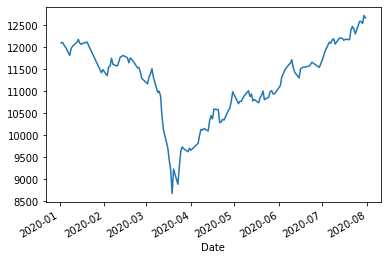

In [56]:
stwii.Close.plot()

收盤價與20日均線畫在一起

<AxesSubplot:xlabel='Date'>

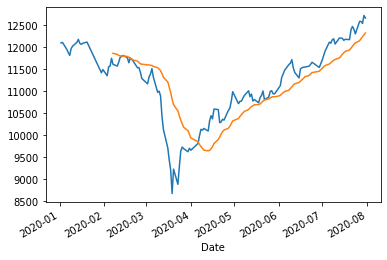

In [57]:
stwii.Close.plot()
stwii.Close.rolling(20).mean().plot()

- 柱狀圖

<AxesSubplot:>

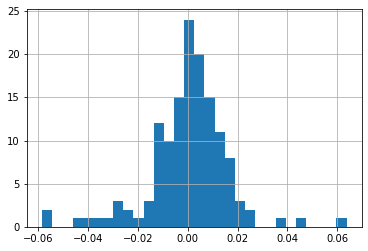

In [58]:
stwii["Return"] = stwii["Close"].diff(1)/stwii["Close"].shift(1)
stwii.Return.hist(bins=30)
#df['Return'].plot.density()

- 直方圖

<AxesSubplot:>

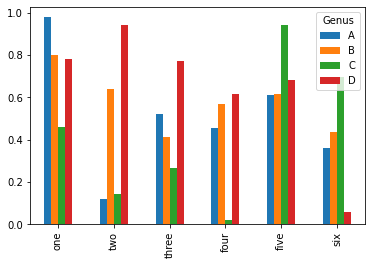

In [59]:
df1 = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df1.plot.bar()

In [60]:
df1

Genus,A,B,C,D
one,0.978618,0.799159,0.461479,0.780529
two,0.118274,0.639921,0.143353,0.944669
three,0.521848,0.414662,0.264556,0.774234
four,0.456150,0.568434,0.018790,0.617635
five,0.612096,0.616934,0.943748,0.681820
six,0.359508,0.437032,0.697631,0.060225


- 畫出累積報酬率圖

2020年1月1日投入1元後，2020年7月31日時變為多少元

<AxesSubplot:xlabel='Date'>

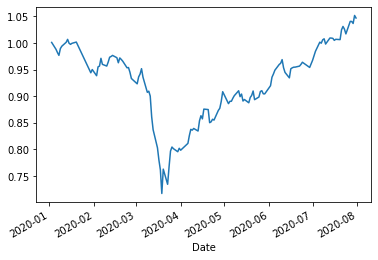

In [61]:
((1+stwii.Return).cumprod()).plot()

### **更換畫圖的風格：**
- default：預設的風格
- ggplot：模仿R的ggplot風格
- seaborn：另一個python套件，圖片風格也很漂亮。

In [62]:
plt.style.available[0:]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [63]:
plt.style.use('seaborn')

<AxesSubplot:xlabel='Date'>

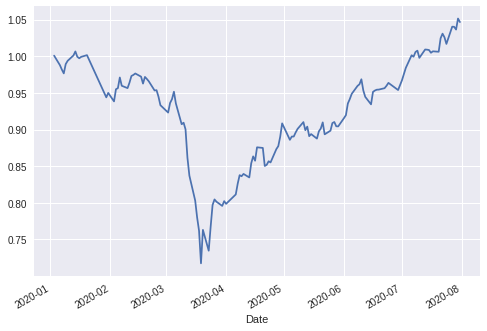

In [64]:
((1+stwii.Return).cumprod()).plot()

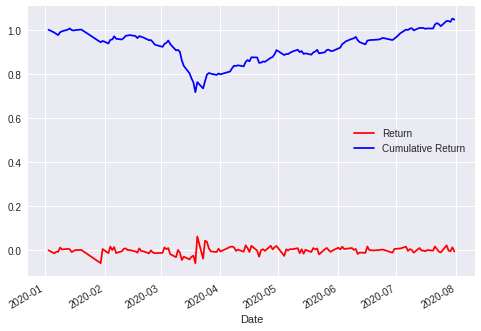

In [65]:
stwii.Return.plot(color='r')
((1+stwii.Return).cumprod()).plot(color='b')
plt.legend(['Return', 'Cumulative Return'])

Text(0.5, 1.0, 'Close')

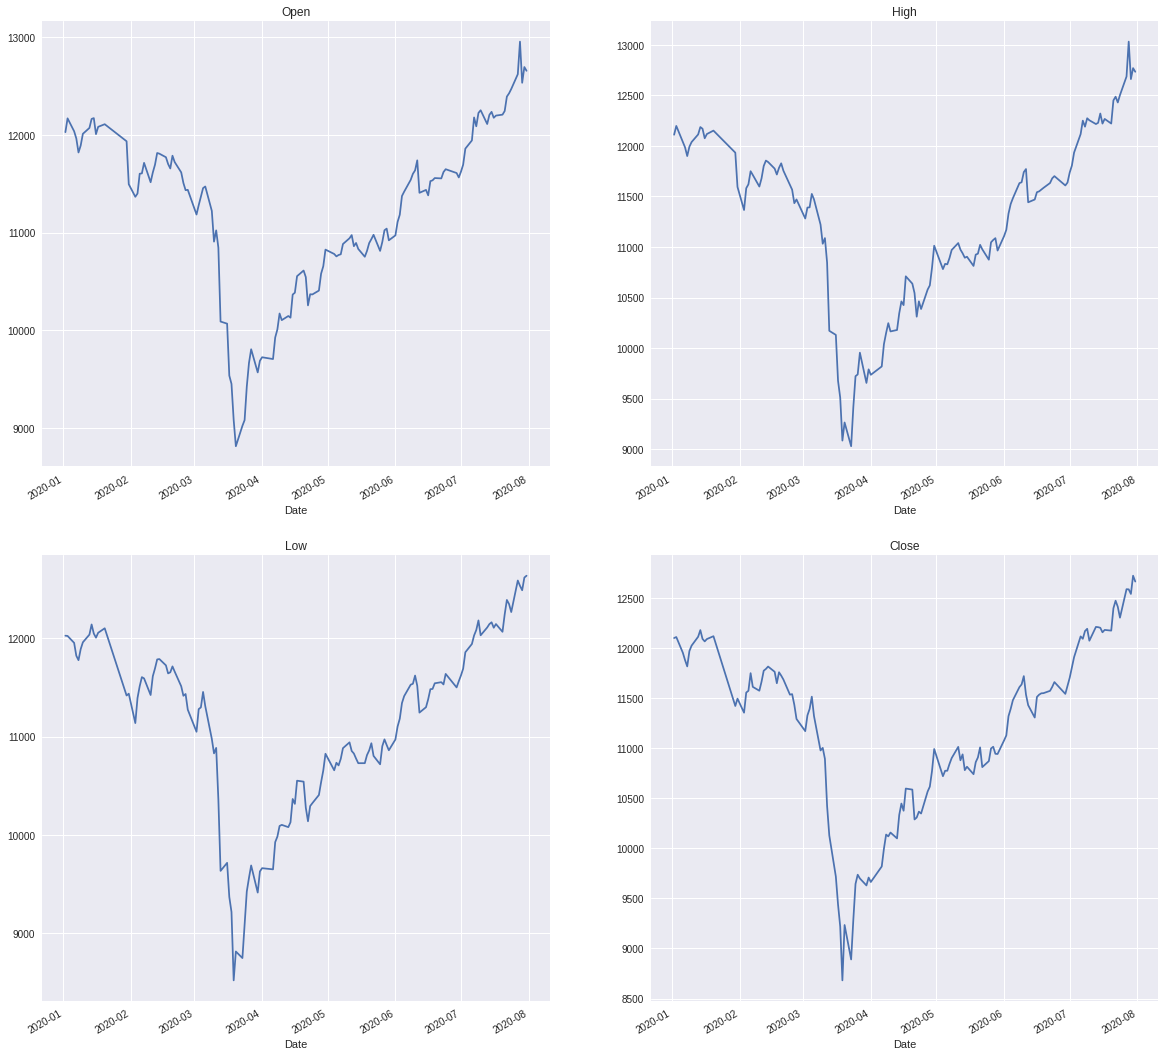

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
stwii['Open'].plot(ax=axes[0,0]); axes[0,0].set_title('Open')
stwii['High'].plot(ax=axes[0,1]); axes[0,1].set_title('High')
stwii['Low'].plot(ax=axes[1,0]); axes[1,0].set_title('Low')
stwii['Close'].plot(ax=axes[1,1]); axes[1,1].set_title('Close')

### **K線圖**

In [67]:
KBar = [] 
Date = []
開始日=datetime.datetime(2020,1,1)
股票代碼='2330.tw'
結束日=datetime.datetime(2020,7,31)
s2330=web.DataReader(股票代碼,'yahoo',開始日,結束日)
s2330.reset_index(drop=False, inplace=True)

for i in range(0, s2330.shape[0]):
    day = s2330["Date"][i]
    price = [s2330["Open"][i], s2330["Close"][i], s2330["Low"][i], s2330["High"][i]]
    Date.append(day)
    KBar.append(price)
    
kline = Kline()  
kline.add_xaxis(xaxis_data = Date) 
kline.add_yaxis(series_name = "股價", 
                y_axis = KBar,  
                itemstyle_opts = opts.ItemStyleOpts(color = "#C23531",
                                                    color0 = "#00da3c", 
                                                    border_color = "#C23531", 
                                                    border_color0 = "#00da3c"),
                )
kline.set_global_opts(title_opts = opts.TitleOpts(title = "台積電(2330)"),
                      xaxis_opts = opts.AxisOpts(is_scale = True),
                      yaxis_opts = opts.AxisOpts(is_scale = True, splitarea_opts = opts.SplitAreaOpts(is_show = True, areastyle_opts = opts.AreaStyleOpts(opacity=1))), 
                      datazoom_opts = [opts.DataZoomOpts(type_ = "inside"),   
                                       opts.DataZoomOpts(is_show=True,  
                                                         type_="slider",),
                                       ],
                      tooltip_opts = opts.TooltipOpts(trigger="axis", 
                                                      axis_pointer_type="cross", 
                                                      background_color="rgba(245, 245, 245, 0.8)",
                                                      border_width=1,
                                                      border_color="#ccc",
                                                      textstyle_opts=opts.TextStyleOpts(color="#000"), 
                                                      ),
                      )
kline.render_notebook()

/opt/tljh/user/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


### **練習 3：畫圖**
1. 請畫出Google (GOOG)收盤價時間序列圖。
2. 請畫出報酬率的柱狀圖。
3. 請同時畫出兩個子圖，累積報酬率圖與交易量圖。

------
<a id='appendix'></a>
## **補充：操作Excel的寫入與寫出方法**
[回目錄](#HOME)

### **將我們下載好的股價資料儲存到Excel內**
- 輸入的參數：
    1. Excel的存儲路徑：只需要輸入檔案名稱即可
    2. sheet_name：Excel的工作表名稱

In [68]:
開始日=datetime.datetime(2020,1,1)
股票代碼='2330.tw'
結束日=datetime.datetime(2020,7,31)
s2330=web.DataReader(股票代碼,'yahoo',開始日,結束日)
s2330.to_excel('2330.xlsx', sheet_name='股價資料')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/tljh/user/lib/python3.7/site-packages/pandas_datareader/data.py:384: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.50.30', 36188), raddr=('119.161.14.18', 443)>
  session=session,


### **讀取Excel的資料**
- 輸入的參數：
    1. Excel的存儲路徑：只需要輸入檔案名稱即可
    2. sheet_name：Excel的工作表名稱
    3. header：用哪一列作列名：一般很少設置
    4. index_col：用作索引的欄 (如index_col = 0)

In [69]:
data=pd.read_excel('2330.xlsx', sheet_name = '股價資料', header=0, index_col=0)
data.tail()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/tljh/user/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/opt/tljh/user/lib/python3.7/site-packages/xlrd/xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,424.5,416.5,420.5,424.5,99333798,424.5
2020-07-28,466.5,428.5,464.0,435.0,166307746,435.0
2020-07-29,431.5,419.5,428.0,422.0,85663166,422.0
2020-07-30,441.0,428.5,436.5,434.0,69293949,434.0
2020-07-31,432.0,425.5,426.0,425.5,49897674,425.5


### **實用的參考網站：**
[10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min)
[十分鐘的pandas入門教學](https://ericfu.me/10-minutes-to-pandas/)